In [ ]:
! pip install kaggle

In [ ]:
!pip install opencv-python-headless

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle_credentials/kaggle.json' ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! mkdir /content/kaggle_data

In [ ]:
%%shell
ls /
if [ ! -d "/root/.kaggle/kaggle.json" ]; then
  echo "$DIRECTORY does not exist."
fi

bin			    datalab  kaggle  libx32		       opt   sbin  tools
boot			    dev      lib     media		       proc  srv   usr
content			    etc      lib32   mnt		       root  sys   var
cuda-keyring_1.0-1_all.deb  home     lib64   NGC-DL-CONTAINER-LICENSE  run   tmp
 does not exist.


In [ ]:
! kaggle datasets download -p /content/kaggle_data tenxengineers/denoising-dataset-multiple-iso-levels

Dataset URL: https://www.kaggle.com/datasets/tenxengineers/denoising-dataset-multiple-iso-levels
License(s): CC-BY-SA-4.0
100% 2.40G/2.40G [00:23<00:00, 18.6MB/s]
100% 2.40G/2.40G [00:23<00:00, 108MB/s] 


In [ ]:
! unzip /content/kaggle_data/denoising-dataset-multiple-iso-levels.zip -d /content/kaggle_data/denoising-dataset-multiple-iso-levels/

Archive:  /content/kaggle_data/denoising-dataset-multiple-iso-levels.zip
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene1.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene10.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene11.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene12.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/Alp

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2

Folder with noisy data

In [ ]:
# Create a list of image paths
txt_files = []
for root, dirs, files in os.walk("/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Noised"):
    for file in files:
        if file.endswith("AlphaISP_2592x1536_8bits_Scene10.png"):
            txt_files.append(os.path.join(root, file))
        if file.endswith("AlphaISP_2592x1536_8bits_Scene10_missing.png"):
            txt_files.append(os.path.join(root, file))

In [ ]:
# Function to display an image with a title using matplotlib
def customShow(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Helper function to display images
def show_image(title, image):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Noised/AlphaISP_2592x1536_8bits_Scene10_missing.png
/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Noised/AlphaISP_2592x1536_8bits_Scene10.png


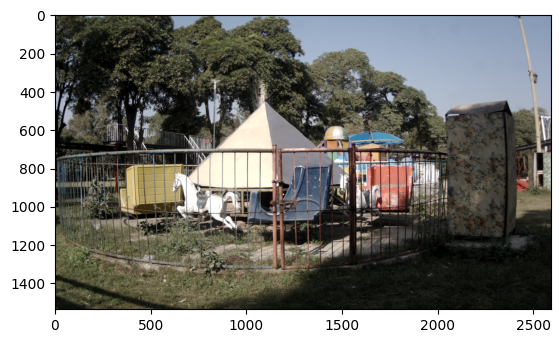

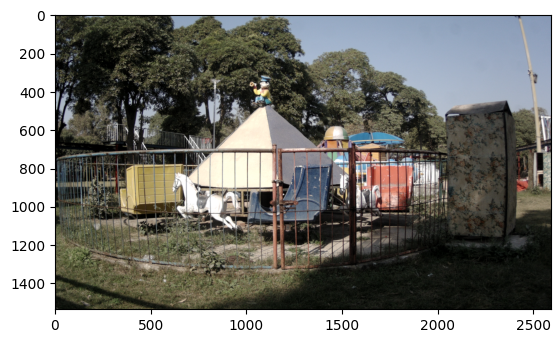

In [ ]:
from skimage import io

for noisy_image in txt_files:
  print(noisy_image)
  plt.figure()
  plt.imshow(io.imread(noisy_image))
plt.show()

In [32]:

# Load the image
image_path = txt_files[1]
image = cv2.imread(image_path)
show_image('Original Image', image)

# 1. Noise Reduction using Gaussian Blurring
noise_reduced = cv2.GaussianBlur(image, (5, 5), 0)
show_image('Noise Reduced', noise_reduced)

# 2. Change Detection
# Assume the corresponding clean image is available at the same location with a different name
mod_image = cv2.imread(txt_files[0])
show_image('Modified Image for Change Detection', mod_image)

# Compute the absolute difference between the noisy and clean images
change_detected = cv2.absdiff(image, mod_image)
show_image('Change Detected', change_detected)

# 3. Masking
# Create a binary mask
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (600, 800), (1000, 1150), 255, -1)
show_image('Mask', mask)

# Apply the mask to the noise-reduced image
masked_image = cv2.bitwise_and(noise_reduced, noise_reduced, mask=mask)
show_image('Masked Image', masked_image)


Output hidden; open in https://colab.research.google.com to view.